In [1]:
!pip install xarray

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import xarray as xr
import zarr
import seaborn as sns
import pandas as pd
import sys

In [2]:
print(Path.cwd())
dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')

/Users/kevinha/VYPREarth


/var/folders/fd/c30byq417d3dh1ystdk504100000gp/T/ipykernel_49719/1535083100.py:2: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')


In [3]:
dataset

<xarray.Dataset>
Dimensions:             (time: 966, latitude: 720, longitude: 1440)
Coordinates:
  * latitude            (latitude) float64 89.88 89.62 89.38 ... -89.62 -89.88
  * longitude           (longitude) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
Data variables: (12/35)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>

In [4]:
dataset

<xarray.Dataset>
Dimensions:             (time: 966, latitude: 720, longitude: 1440)
Coordinates:
  * latitude            (latitude) float64 89.88 89.62 89.38 ... -89.62 -89.88
  * longitude           (longitude) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
Data variables: (12/35)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>

In [5]:
def select_variable_data(dataset, variable_name):
    return dataset[variable_name]
def select_spatio_temporal_data(dataset, initial_timestep, timesteps, latitude, longitude):
    if(latitude == -1 and longitude == -1):
        return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps))
    return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps), latitude=latitude, longitude=longitude)

In [20]:
def prepTime(time,latitude, longitude):
    features=['BAs_GWIS', 'FCCI_BA','ws10','Lai','swvl1','mslp','rH_cf', 'FCD_emissions', 'FRP_emissions', 'ssr','NDVI','nina34_anom','ssr']
    BurntArea=select_spatio_temporal_data(select_variable_data(dataset, 'BurntArea'), time, 1, latitude,longitude)
    df=BurntArea.to_dataframe()
    for str in features:
            dfTemp= select_spatio_temporal_data(select_variable_data(dataset, str), time, 1, latitude,longitude).to_dataframe()
            df[str]=dfTemp[str]
    return df
            

In [33]:
def prepRegion(latitude, longitude):
    result=prepTime(0,latitude, longitude)
    for time in range(9,15,6):
        result=pd.concat([result, prepTime(time, latitude, longitude)])
        print(time)
    return result
    

In [34]:
def regionBounds(latStart, latEnd, longStart, longEnd):
    result=prepRegion(latStart, longStart)
    for lat in range(latStart+1, latEnd):
        for long in range(longStart+1, longEnd):
            print(lat)
            print(long)
            result=pd.concat([result, prepRegion(lat, long)])
    return result

In [35]:
def analyze(df,meanFeature, drops):
    for drop in drops:
        df=df.drop(drop, axis=1)
    print(df.info())
    print(df.describe())
    print("mean: ", end=" ")
    print(df.loc[:,meanFeature].mean())
    corr2=df.corr()
    cmap=sns.diverging_palette(230,20,as_cmap=True)
    print(sns.heatmap(corr2,cmap=cmap))
    print("na values")
    print(df.isna().sum())
    return df
    

In [36]:
def uni(data,variable):
    sns.set(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=data,x=variable, ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist,kde=True)
    ax_box.set(xlabel='')
    plt.show()
    sns.countplot(x=variable,data=data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86168 entries, 0 to 86167
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          86168 non-null  object 
 1   longitude           0 non-null      float64
 2   BurntArea           86168 non-null  float64
 3   DCM                 86056 non-null  float64
 4   LST                 85054 non-null  float64
 5   WIND                86168 non-null  float64
 6   PRECIP              86168 non-null  float64
 7   SSR                 86168 non-null  float64
 8   fcd_emissions       50772 non-null  float64
 9   FRP_emissions       50772 non-null  float64
 10  LST_Day_CMG         85054 non-null  float64
 11  Lai                 86162 non-null  float64
 12  censo               86168 non-null  float64
 13  ea                  86168 non-null  float64
 14  epo                 86168 non-null  float64
 15  fwi                 11997 non-null  float64
 16  gmss

/var/folders/fd/c30byq417d3dh1ystdk504100000gp/T/ipykernel_49719/2863770564.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2=df.corr()


Axes(0.125,0.11;0.62x0.77)
na values
Unnamed: 0                0
longitude             86168
BurntArea                 0
DCM                     112
LST                    1114
WIND                      0
PRECIP                    0
SSR                       0
fcd_emissions         35396
FRP_emissions         35396
LST_Day_CMG            1114
Lai                       6
censo                     0
ea                        0
epo                       0
fwi                   74171
gmsst                     0
mslp                      0
nao                       0
nina34_anom               0
pdo                       0
pna                       0
population_density    86168
rH_cf                     0
skt                       0
soi                       0
ssrd                      0
sst                       0
swvl1                     0
t2m                       0
t2mmax                    0
t2mmin                    0
vpd_cf                    0
wp                        0
dtype: int6

,Unnamed: 0,longitude,BurntArea,DCM,LST,WIND,PRECIP,SSR,fcd_emissions,FRP_emissions,...,skt,soi,ssrd,sst,swvl1,t2m,t2mmax,t2mmin,vpd_cf,wp
0,"(Timestamp('2001-01-17 12:00:00'), 46.375, 38....",NaN,64.310000,245.85417,13616.60,5.231612,0.251689,5.107062,NaN,NaN,...,268.99250,1.6,5.850781,-9999.0,0.327223,268.26398,271.16070,265.74072,1.560275,0.42
1,"(Timestamp('2001-01-17 12:00:00'), 46.125, 38....",NaN,21.439999,285.89584,13577.00,5.589812,0.387715,5.162810,NaN,NaN,...,269.30103,1.6,6.133965,-9999.0,0.314571,268.51697,271.34510,266.01000,1.631825,0.42
2,"(Timestamp('2001-01-17 12:00:00'), 46.125, 39....",NaN,64.310000,259.10416,13680.00,5.005371,0.185527,5.334965,NaN,NaN,...,268.78820,1.6,6.179366,-9999.0,0.326348,268.14542,271.31366,265.33975,1.572416,0.42
3,"(Timestamp('2001-01-17 12:00:00'), 46.125, 39....",NaN,278.669980,251.18750,13690.00,4.921711,0.192146,5.372429,NaN,NaN,...,268.71487,1.6,6.162647,-9999.0,0.322277,268.01816,271.23306,265.15600,1.541133,0.42
4,"(Timestamp('2001-01-17 12:00:00'), 46.125, 40....",NaN,42.870000,314.04166,13647.20,4.631002,0.316524,5.369015,NaN,NaN,...,268.45728,1.6,6.122304,-9999.0,0.323397,267.66568,270.89940,264.77466,1.447507,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86163,"(Timestamp('2012-02-10 12:00:00'), -36.125, -7...",NaN,42.879997,974.50000,15340.25,3.017722,3.710252,21.356878,-5.820766e-11,0.000015,...,297.15120,0.8,26.054518,-9999.0,0.263727,295.12793,302.69452,288.64172,12.318872,1.01
86164,"(Timestamp('2012-02-10 12:00:00'), -36.125, -6...",NaN,42.870000,270.67188,15082.50,3.217871,9.159405,18.659650,-5.820766e-11,0.000015,...,296.87500,0.8,22.257301,-9999.0,0.278460,296.04025,302.40543,290.45770,9.319477,1.01
86165,"(Timestamp('2012-02-10 12:00:00'), -36.125, -6...",NaN,42.879997,195.68750,15063.75,3.195175,10.736057,18.578913,-5.820766e-11,0.000015,...,296.30020,0.8,22.520792,-9999.0,0.243575,295.57860,301.89777,290.15042,8.718877,1.01
86166,"(Timestamp('2012-02-10 12:00:00'), -36.375, -6...",NaN,42.879997,215.39844,15167.25,3.323085,8.024761,18.730787,-5.820766e-11,0.000015,...,296.56522,0.8,22.749510,-9999.0,0.178682,295.61285,302.14390,290.01804,9.019606,1.01


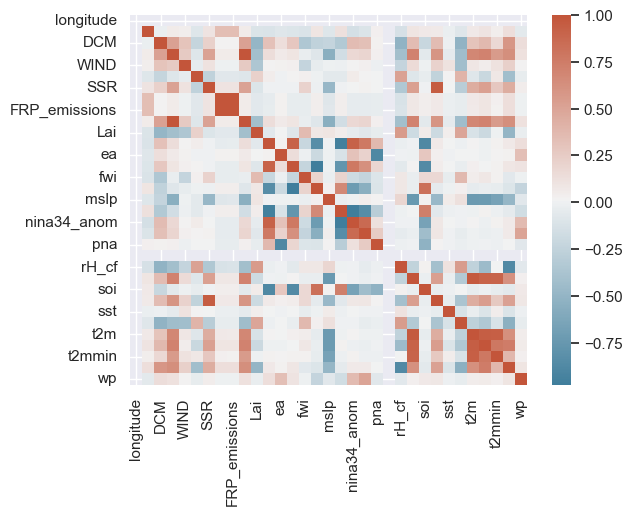

In [37]:
df=pd.read_csv('df2.csv')
df= analyze(df,'BurntArea', ['latitude','mean_fwi'])
df



In [40]:
#log
df= df.loc[df['BurntArea']>0]
df['BurntArea'] = np.log2(df['BurntArea'])

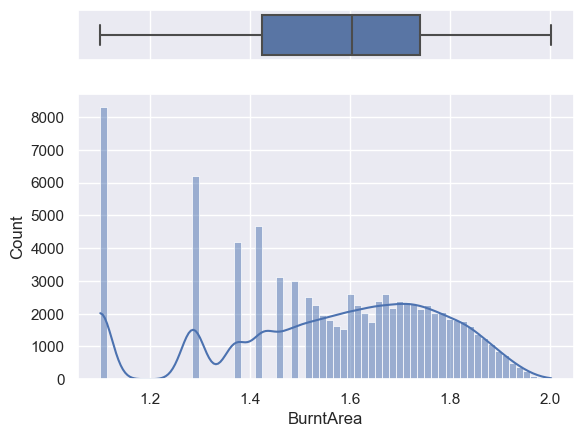

ValueError: Could not interpret input 'ws10'

In [ ]:
uni(df, 'BurntArea')
uni(df, 'ws10')
uni(df, 'mslp')
uni(df, 'swvl1')

In [ ]:
for col in df.columns:
    df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [15]:
X=df.drop(["BurntArea"], axis=1)
y = df["BurntArea"]


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
dTree=DecisionTreeRegressor()
dTree.fit(X_train,y_train)
dTree.score(X_test,y_test)


-0.6078497326218428

In [17]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
dTree=RandomForestRegressor(n_estimators=10)
dTree.fit(X_train,y_train)
dTree.score(X_test,y_test)

-0.22207125762693325

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
dTree=GradientBoostingRegressor(n_estimators=12)
dTree.fit(X_train,y_train)
dTree.score(X_test,y_test)

0.048242896300617955

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')